In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
import tensorflow as tf

In [4]:
newMat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graduate research new_code/newMat_CSV.csv')

In [5]:
newMat

,dp,dx,k2,k3,k4,k5,k6,k7,k8,k9,PP0,B0,sumClot,maxHeight,LagT,ETP,Cmax,Tmax,clot_size
0,703.355,0.220495,0.000012,2.370500e-07,0.000482,0.000020,0.000004,1.181680e-10,3.692580e-10,0.020202,1385.25,134.310,4440.68,0.0,2.325000,854.167038,50.543897,24.350000,0
1,715.103,0.227286,0.000010,2.277300e-07,0.000464,0.000019,0.000004,1.311100e-10,4.344110e-10,0.021096,1450.93,133.434,3365.83,0.0,2.391667,735.767126,42.519202,26.641667,0
2,628.882,0.257888,0.000010,2.628810e-07,0.000522,0.000017,0.000004,1.240010e-10,4.065420e-10,0.021132,1376.71,136.873,5599.67,0.0,2.658333,553.294675,32.737451,29.775000,0
3,542.294,0.139077,0.000011,2.490990e-07,0.000436,0.000017,0.000004,1.168780e-10,4.194810e-10,0.021173,1442.96,126.789,3355.50,0.0,2.708333,593.556719,35.569647,29.466667,0
4,310.933,0.148333,0.000010,2.400490e-07,0.000514,0.000019,0.000004,1.172680e-10,4.038340e-10,0.022095,1370.79,126.351,165721.00,5.0,2.616667,535.849464,30.728191,29.275000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,319.908,0.286154,0.000011,2.494290e-07,0.000466,0.000017,0.000004,1.355490e-10,3.676460e-10,0.018645,1327.53,126.362,309529.00,6.0,2.683333,653.734867,39.278895,28.875000,1
3548,288.369,0.367184,0.000012,2.271410e-07,0.000438,0.000019,0.000004,1.397520e-10,4.390840e-10,0.019049,1538.97,138.498,520793.00,7.0,2.075000,1190.098502,87.923754,20.941667,1
3549,260.578,0.151167,0.000010,2.295580e-07,0.000459,0.000018,0.000004,1.184200e-10,3.892140e-10,0.019481,1332.73,123.871,251406.00,6.0,2.683333,591.656365,35.119884,29.525000,1
3550,676.764,0.334048,0.000010,2.404450e-07,0.000517,0.000018,0.000004,1.371150e-10,4.025380e-10,0.019543,1400.80,127.467,6758.98,0.0,2.558333,673.807792,40.078959,28.516667,0


def clot_size(value):
    if value <= 1:
        return 0
    elif 2 <= value <= 10:
        return 1

    

newMat['clot_size'] = newMat['maxHeight'].map(clot_size)

In [6]:
from sklearn.metrics import accuracy_score
res = tf.feature_column.categorical_column_with_vocabulary_list("clot_size", [0, 1])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [7]:
dp = tf.feature_column.numeric_column("dp")
dx = tf.feature_column.numeric_column("dx")
LagT = tf.feature_column.numeric_column("LagT")
ETP = tf.feature_column.numeric_column("ETP")
Cmax = tf.feature_column.numeric_column("Cmax")
Tmax = tf.feature_column.numeric_column("Tmax")

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [8]:
from sklearn.model_selection import train_test_split
x_data = newMat[["dp", "dx", "LagT", "ETP", "Cmax", "Tmax"]]
y_labels = newMat['clot_size']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

In [9]:
y_train = pd.to_numeric(y_train, downcast='integer')
y_test = pd.to_numeric(y_test, downcast = 'integer')
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [10]:
feat_cols = [dp, dx, LagT, ETP, Cmax, Tmax]

In [11]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=200,
                                               num_epochs=None,
                                               shuffle=True)


Instructions for updating:
Use tf.keras instead.


In [12]:
from sklearn import svm, datasets, metrics


In [13]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [14]:
from tensorflow.keras.optimizers import legacy

model = tf.estimator.DNNClassifier(feature_columns=feat_cols, optimizer = legacy.Adam, 
                                          hidden_units=[500, 250, 100],
                                          #dropout=0.025,
                                          #activation_fn = tf.nn.softmax,
                                          #optimizer='Adagrad',
                                          n_classes=2)

Instructions for updating:
Use tf.keras instead.


In [15]:
y_test_n = y_test.to_numpy()

In [16]:
print("Training model...")
print("LogLoss error (on validation data):")
validation_errors = []
for period in range (0, 200):
# Train the model, starting from the prior state.
    model.train(
    input_fn=input_func,
    steps=500
    )
    pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
    y_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=y_test,batch_size=len(y_test),shuffle=False)
    
    validation_predictions = list(model.predict(input_fn=pred_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,0)
    validation_log_loss = metrics.log_loss(y_test_n, validation_pred_one_hot)
    print(" period %02d : %0.2f" % (period, validation_log_loss))
    validation_errors.append(validation_log_loss)
    

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Training model...
LogLoss error (on validation data):


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


 period 00 : 3.23


Instructions for updating:
Use standard file utilities to get mtimes.


 period 01 : 2.66
 period 02 : 2.42
 period 03 : 2.36


Instructions for updating:
Use standard file APIs to delete files with this prefix.


 period 04 : 2.47
 period 05 : 2.41
 period 06 : 2.48
 period 07 : 2.44
 period 08 : 1.93
 period 09 : 1.84
 period 10 : 1.47
 period 11 : 1.67
 period 12 : 1.76
 period 13 : 1.11
 period 14 : 1.30
 period 15 : 1.88
 period 16 : 1.24
 period 17 : 1.12
 period 18 : 1.39
 period 19 : 1.21
 period 20 : 1.27
 period 21 : 1.50
 period 22 : 0.99
 period 23 : 1.05
 period 24 : 1.30
 period 25 : 1.50
 period 26 : 1.81
 period 27 : 1.51
 period 28 : 1.62
 period 29 : 1.15
 period 30 : 1.06
 period 31 : 1.35
 period 32 : 1.15
 period 33 : 1.02
 period 34 : 1.03
 period 35 : 1.03
 period 36 : 1.97
 period 37 : 1.21
 period 38 : 1.08
 period 39 : 1.18
 period 40 : 1.57
 period 41 : 1.03
 period 42 : 0.90
 period 43 : 1.21
 period 44 : 1.27
 period 45 : 1.72
 period 46 : 1.57


 period 47 : 1.70
 period 48 : 1.08
 period 49 : 1.45
 period 50 : 1.02
 period 51 : 1.36
 period 52 : 1.05
 period 53 : 1.38
 period 54 : 1.00
 period 55 : 1.09
 period 56 : 1.06
 period 57 : 0.84
 period 58 : 0.97
 period 59 : 0.82
 period 60 : 0.87
 period 61 : 1.09
 period 62 : 1.15
 period 63 : 1.00
 period 64 : 0.91
 period 65 : 1.20
 period 66 : 1.00
 period 67 : 0.91
 period 68 : 2.23
 period 69 : 1.17
 period 70 : 1.12
 period 71 : 1.59
 period 72 : 1.03
 period 73 : 1.00
 period 74 : 0.99
 period 75 : 1.00
 period 76 : 1.14
 period 77 : 1.27
 period 78 : 0.94
 period 79 : 0.96
 period 80 : 1.11
 period 81 : 1.00
 period 82 : 0.96
 period 83 : 1.36
 period 84 : 1.02
 period 85 : 0.88
 period 86 : 0.99
 period 87 : 1.14
 period 88 : 1.15
 period 89 : 1.05
 period 90 : 0.94
 period 91 : 1.06
 period 92 : 1.05
 period 93 : 1.66
 period 94 : 1.14
 period 95 : 1.12
 period 96 : 1.42
 period 97 : 0.99
 period 98 : 0.97
 period 99 : 1.14
 period 100 : 0.99
 period 101 : 0.93
 period 

In [17]:
final_predictions = model.predict(input_fn=pred_fn)
final_predictions = np.array([item['class_ids'][0] for item in final_predictions])
 

Final accuracy (on validation data): 0.94


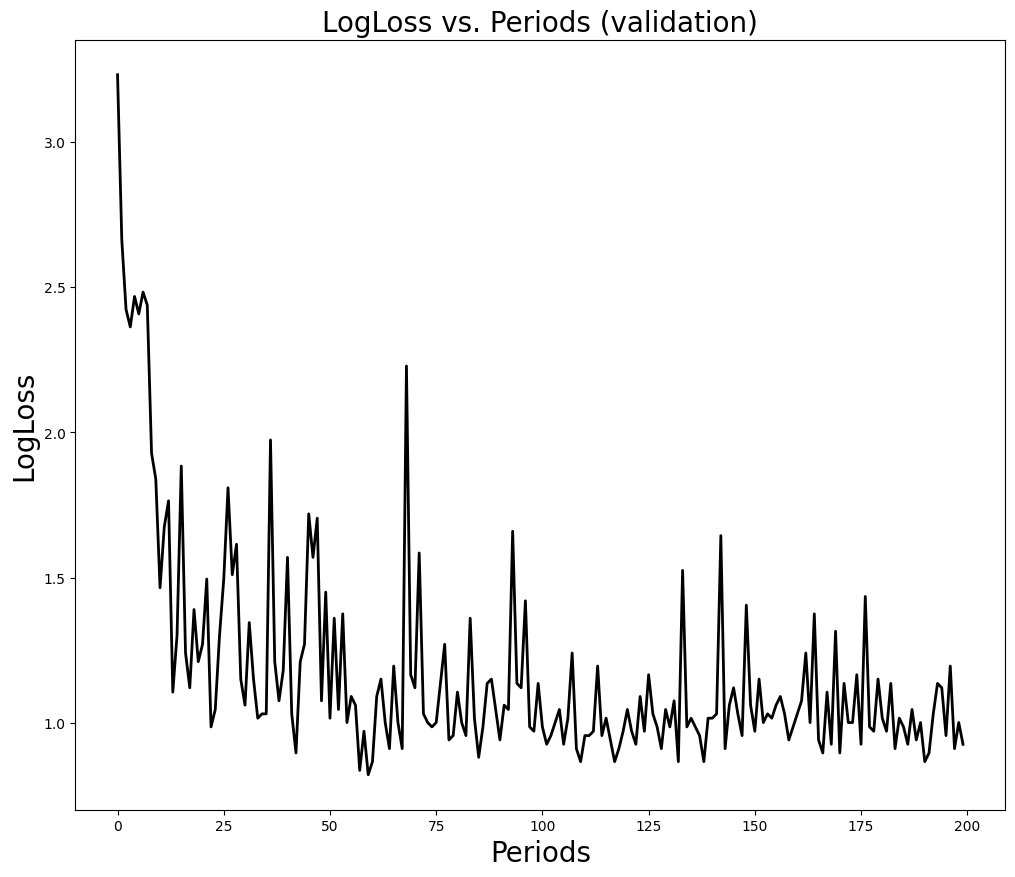

In [18]:
accuracy = metrics.accuracy_score(y_test_n, final_predictions)
print("Final accuracy (on validation data): %0.2f" % accuracy)
plt.rcParams["figure.figsize"] = (12,10)
# Output a graph of loss metrics over periods.
plt.ylabel("LogLoss", fontsize = 20)
plt.xlabel("Periods", fontsize = 20)
plt.title("LogLoss vs. Periods (validation)", fontsize = 20)
plt.plot(validation_errors, 'k', linewidth = 2)
#plt.legend()
plt.show()

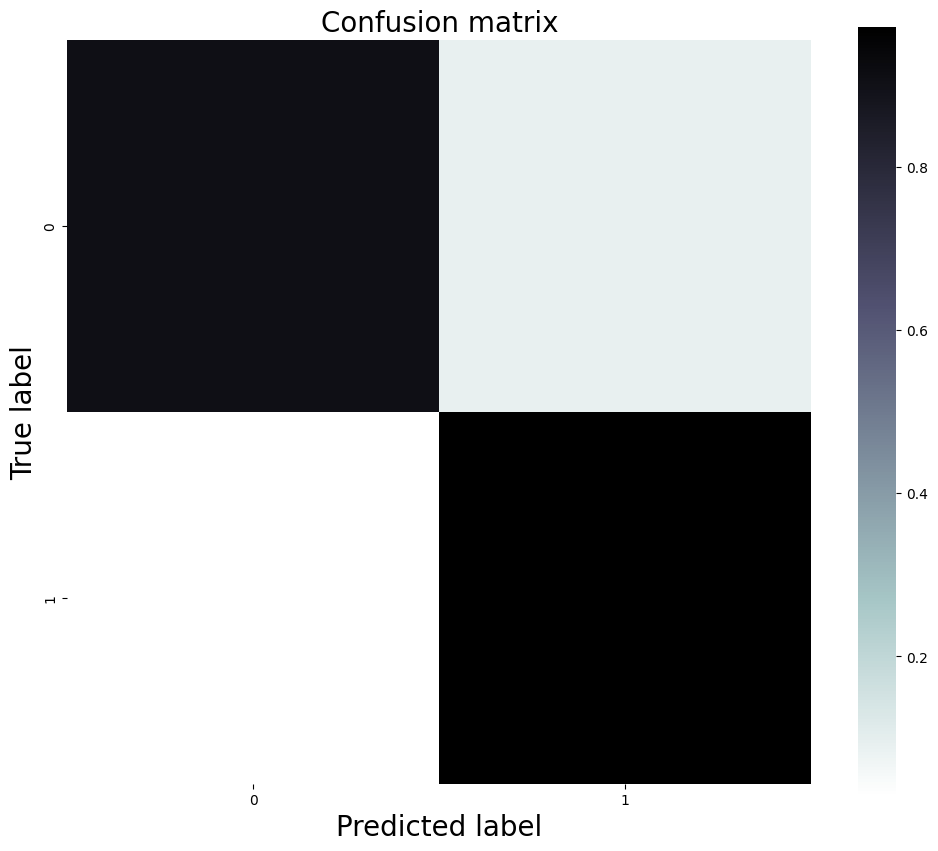

In [19]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,10)

cm = metrics.confusion_matrix(y_test_n, final_predictions)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class).
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix", fontsize = 20)
plt.ylabel("True label", fontsize = 20)
plt.xlabel("Predicted label", fontsize = 20)
plt.show()

In [20]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test_n, final_predictions, labels=[0, 1])))

Classification report for classifier <tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2 object at 0x7f9367ceef20>:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       494
           1       0.92      0.97      0.95       572

    accuracy                           0.94      1066
   macro avg       0.94      0.94      0.94      1066
weighted avg       0.94      0.94      0.94      1066




In [21]:
accuracy = accuracy_score(y_test_n, final_predictions)
DNN = accuracy
print('Accuracy: {:.2f}%'.format(DNN * 100))

Accuracy: 94.18%


# SVM

## SVM with bagging

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(kernel='rbf', gamma='scale')
bagging_svm = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), random_state=42)

In [23]:
y_pred = bagging_svm.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion = print(confusion_matrix(y_test_n, y_pred))
confusion

[[412  82]
 [ 90 482]]


In [26]:
print(classification_report(y_test_n, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       494
           1       0.85      0.84      0.85       572

    accuracy                           0.84      1066
   macro avg       0.84      0.84      0.84      1066
weighted avg       0.84      0.84      0.84      1066



In [27]:
accuracy = accuracy_score(y_test_n, y_pred)
SVM_with_Bagging = accuracy
print('Accuracy: {:.2f}%'.format(SVM_with_Bagging * 100))

Accuracy: 83.86%


## SVM with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train_selected, y_train)

sv_classifier = grid.best_estimator_

In [29]:
svm_two = sv_classifier.fit(X_train, y_train)

In [30]:
y_pred_svm_two = svm_two.predict(X_test)
confusion = confusion_matrix(y_test_n, y_pred_svm_two)
print(confusion)

[[455  39]
 [ 38 534]]


<Axes: >

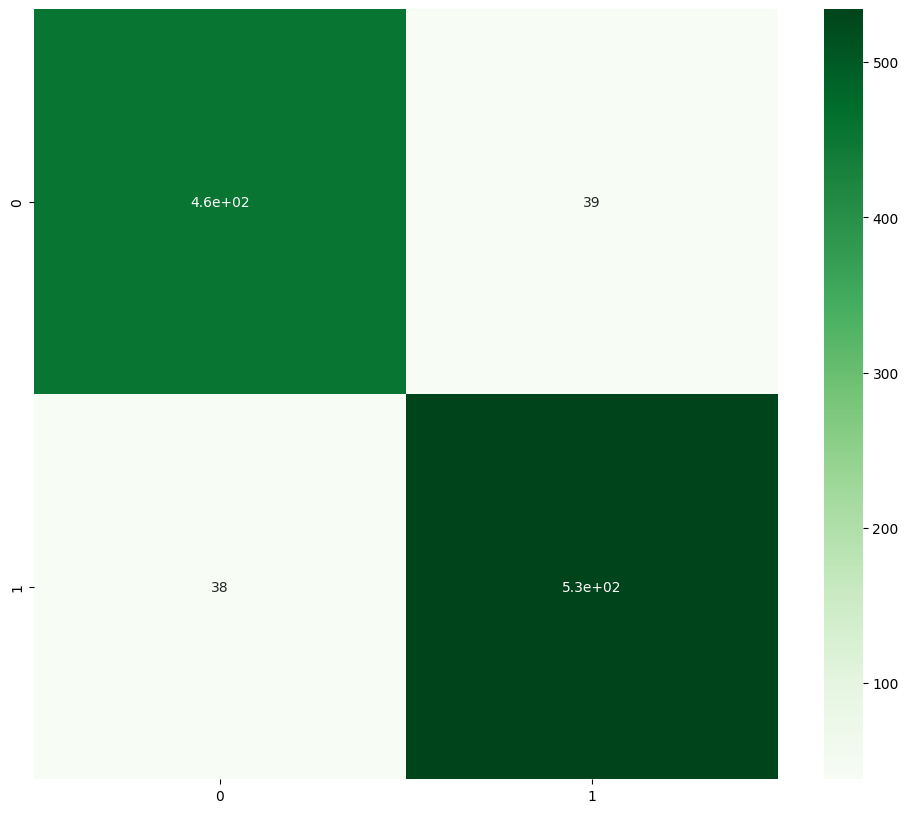

In [31]:
import seaborn as sns
sns.heatmap(confusion, annot=True, cmap = 'Greens')

In [32]:
print(classification_report(y_test_n, y_pred_svm_two))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       494
           1       0.93      0.93      0.93       572

    accuracy                           0.93      1066
   macro avg       0.93      0.93      0.93      1066
weighted avg       0.93      0.93      0.93      1066



In [33]:
accuracy = accuracy_score(y_test_n, y_pred_svm_two)
SVM_with_GridSearch = accuracy
print('Accuracy: {:.2f}%'.format(SVM_with_GridSearch * 100))

Accuracy: 92.78%


# XG Boost

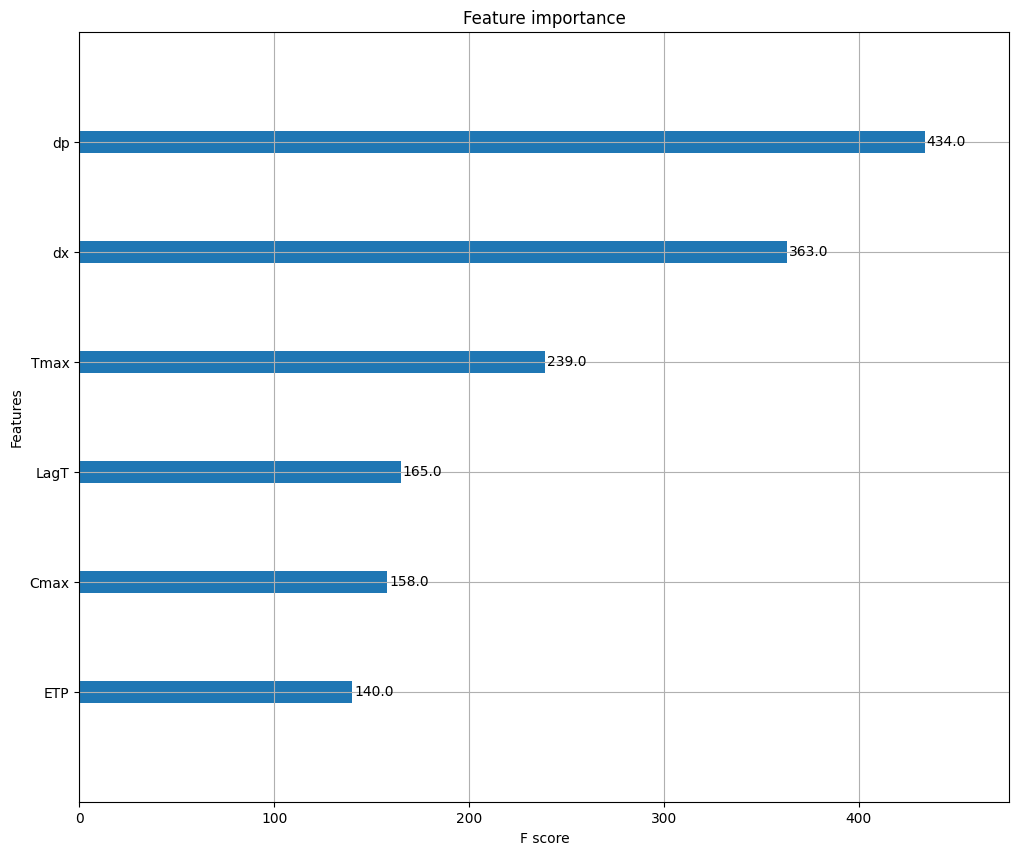

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       494
           1       0.96      0.97      0.97       572

    accuracy                           0.96      1066
   macro avg       0.96      0.96      0.96      1066
weighted avg       0.96      0.96      0.96      1066



In [34]:
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

xgb.plot_importance(xg)
plt.show()

y_pred = xg.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
XGBoost = accuracy
print('Accuracy: {:.2f}%'.format(XGBoost * 100))

Accuracy: 96.25%


# Decision Tree

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision = DecisionTreeClassifier(max_depth=3)

decision.fit(X_train, y_train)

y_pred = decision.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       494
           1       0.98      0.94      0.96       572

    accuracy                           0.96      1066
   macro avg       0.96      0.96      0.96      1066
weighted avg       0.96      0.96      0.96      1066



In [39]:
accuracy = accuracy_score(y_test, y_pred)
Decision_Tree = accuracy
print('Accuracy: {:.2f}%'.format(Decision_Tree * 100))

Accuracy: 95.59%


# Catboost

In [40]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.015199
0:	learn: 0.6636516	total: 51.1ms	remaining: 51s
1:	learn: 0.6370380	total: 53.8ms	remaining: 26.9s
2:	learn: 0.6160317	total: 56.5ms	remaining: 18.8s
3:	learn: 0.5948349	total: 59ms	remaining: 14.7s
4:	learn: 0.5723419	total: 61.5ms	remaining: 12.2s
5:	learn: 0.5552507	total: 64ms	remaining: 10.6s
6:	learn: 0.5352486	total: 66.7ms	remaining: 9.46s
7:	learn: 0.5140205	total: 69.1ms	remaining: 8.57s
8:	learn: 0.4982071	total: 71.7ms	remaining: 7.9s
9:	learn: 0.4807157	total: 74.5ms	remaining: 7.38s
10:	learn: 0.4629502	total: 77.3ms	remaining: 6.95s
11:	learn: 0.4489521	total: 80ms	remaining: 6.59s
12:	learn: 0.4367171	total: 82.6ms	remaining: 6.27s
13:	learn: 0.4256574	total: 85.2ms	remaining: 6s
14:	learn: 0.4122987	total: 87.9ms	remaining: 5.77s
15:	learn: 0.4016026	total: 90.5ms	remaining: 5.57s
16:	learn: 0.3880280	total: 93.1ms	remaining: 5.38s
17:	learn: 0.3775876	total: 95.7ms	remaining: 5.22s
18:	learn: 0.3653659	total: 98.3ms	remaining: 5.08s
19:	

<Axes: >

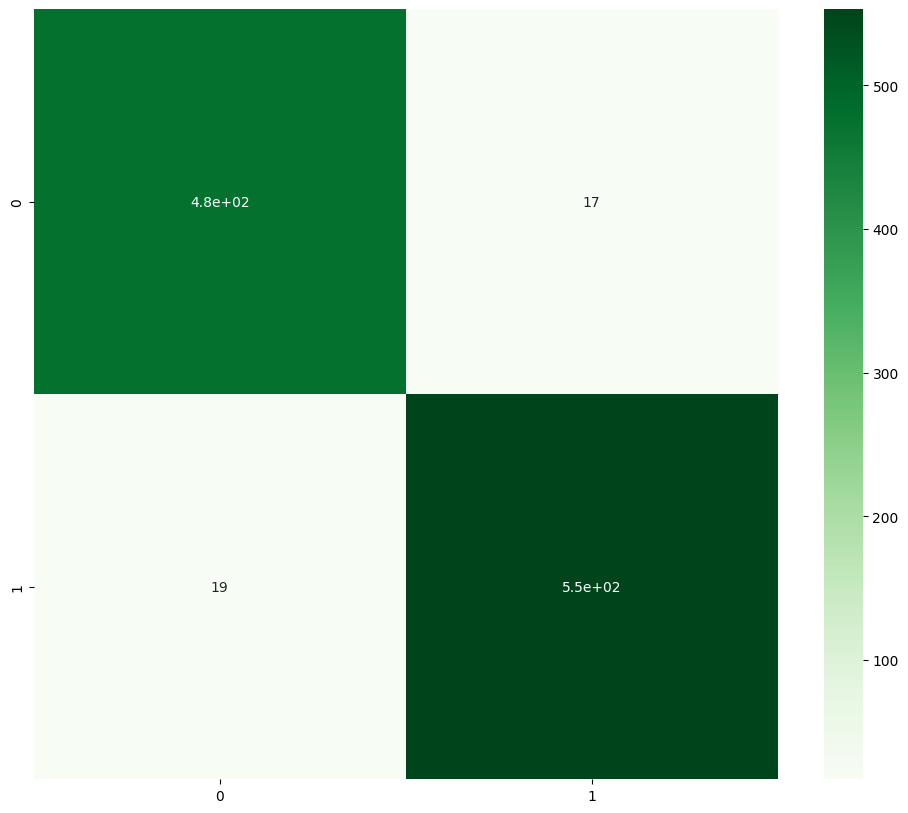

In [41]:
import catboost
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier()

catboost_classifier.fit(X_train, y_train)

y_pred_cat = catboost_classifier.predict(X_test)
cat_heat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cat_heat, annot = True, cmap = 'Greens')

In [42]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       494
           1       0.97      0.97      0.97       572

    accuracy                           0.97      1066
   macro avg       0.97      0.97      0.97      1066
weighted avg       0.97      0.97      0.97      1066



In [43]:
accuracy = accuracy_score(y_test, y_pred_cat)
CatBoost = accuracy
print('Accuracy: {:.2f}%'.format(CatBoost * 100))

Accuracy: 96.62%


# Comparison table and plot for different models






In [44]:
accuracies = {'Models' : ['DNN', 'SVM_with_Bagging', 'SVM_with_GridSearch', 'XGBoost', 'Decision_Tree', 'CatBoost'],
              'Accuracies' : [DNN*100, SVM_with_Bagging*100, SVM_with_GridSearch*100, XGBoost*100, Decision_Tree*100, CatBoost*100]}
all_accuracies = pd.DataFrame(accuracies)

sorted_accuracies = all_accuracies.sort_values('Accuracies').reset_index().drop(columns = 'index', axis = 0)
sorted_accuracies

,Models,Accuracies
0,SVM_with_Bagging,83.864916
1,SVM_with_GridSearch,92.776735
2,DNN,94.183865
3,Decision_Tree,95.590994
4,XGBoost,96.247655
5,CatBoost,96.622889


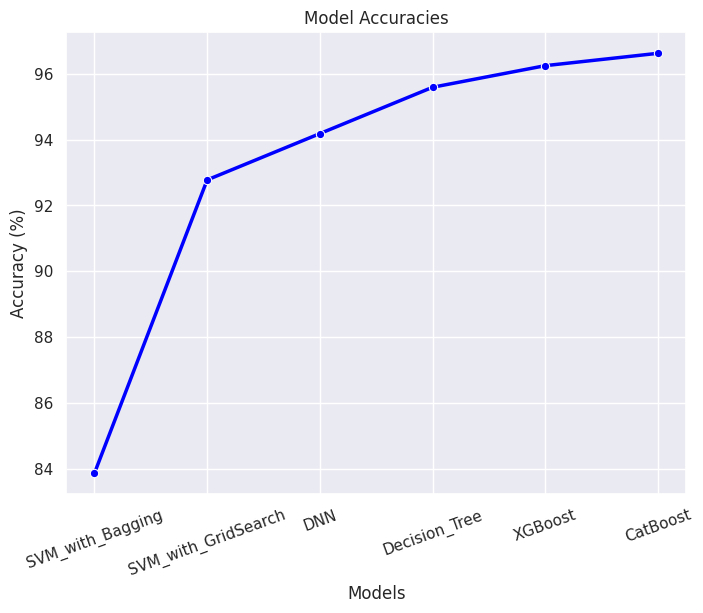

In [45]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x=sorted_accuracies.index, y='Accuracies', data=sorted_accuracies, marker='o', color='blue', linewidth=2.5)

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 6), sorted_accuracies['Models'], rotation = 20)

plt.show()